In [14]:
import pandas as pd
import numpy as np
import math
import random 
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
import os

In [2]:
def coordinates_on_circle(n):
    """Returns x,y coordinates of points on an unit circle with spacing 2π/n"""
    if type(n)!=int:
        raise Exception("Wrong input: \n the argument must be an integer number of points on the unit circle!")
    x,y = [],[]
    step_angle = 2*math.pi/n
    for i in range(0,n):
        x.insert(len(x),math.cos(i*step_angle))
        y.insert(len(y),math.sin(i*step_angle))
    return x,y

In [3]:
def create_starting_graph(n,r):
    if type(r)!=int:
        raise Exception("Wrong input: \n r must be an integer number of edges between vertices")
    if r>n-1:
        raise Exception("Wrong input: \n r must not exceed n-1!")
    coords = coordinates_on_circle(n)
    
    #create adjacency_matrix as pandas df
    #Initialize adjacency matrix
    adj_mat_df = pd.DataFrame(np.zeros([n,n]),dtype='bool')
    #Make starting connections with pbc
    for i in range(0,n):
        #left
        if(i-r>=0):
            adj_mat_df.iloc[i][i-r:i] = True
        else:
            diff = r-i
            adj_mat_df.iloc[i][0:i] = True
            adj_mat_df.iloc[i][n-diff:n+1] = True
        #right
        if(i+r<n):
            adj_mat_df.iloc[i][i+1:i+r+1] = True #+1 to avoid self loop and up to sym value
        else:
            diff = i+r-n
            adj_mat_df.iloc[i][i+1:n+1] = True
            adj_mat_df.iloc[i][0:diff+1] = True

    return adj_mat_df


In [43]:
def create_strogatz(n, r ,p, place_labels=False ):
    """Plots the graph of the Strogatz model on a unit circle."""
    
    #Procedure to create results folder automatically
    path = os.getcwd()
    results_dir = "/results_WS" 
    try:
        os.mkdir(path+results_dir)
    except OSError:
        print ("Creation of the directory %s failed" % results_dir)
    else:
        print ("Successfully created the directory %s " % results_dir)
    #names for file paths
    name_plot = "/plot_n%d_r%d_p%d.png" %(n,r,p)
    name_csv = "/data_n%d_r%d_p%d.csv" %(n,r,p)
    name_plot_rewired = "/plot_rewired_n%d_r%d_p%d.png" %(n,r,p)
    name_csv_rewired = "/data_rewired_n%d_r%d_p%d.csv" %(n,r,p)
    
    
    #check for errors
    if p>1 or p<0:
        raise Exception("Wrong input: \n p must be in [0,1]")
    coords = coordinates_on_circle(n)
    adj_mat = create_starting_graph(n,r)
    labels_nodes = []
    nodes_coords = coordinates_on_circle(n)
    #figure settings
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9))
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle("WS(N=%d; 2r = %d), Starting configuration"%(n,2*r),fontsize=25)
    #plot graph
    for i in range(0,n):
        connections_list = adj_mat[adj_mat.iloc[i] == True].index.tolist()
    #print(connections_list) 
        for k in range(0,len(connections_list)):
            ax1.plot([nodes_coords[0][i],nodes_coords[0][connections_list[k]]],[nodes_coords[1][i],nodes_coords[1][connections_list[k]]],linewidth=.5,color='indianred')
    ax1.plot(nodes_coords[0],nodes_coords[1],color='steelblue',ls='none',marker='o',markersize=10,label=labels_nodes)
    ax1.set_title("Graph representation",fontsize=20)
    ax1.set_xticks([])
    ax1.set_yticks([])
    #labels on vertices
    if place_labels==True:
        for i in range(0,n):
            labels_nodes.append("%d"%i)
            ax1.text(nodes_coords[0][i],nodes_coords[1][i],labels_nodes[i],fontsize=15)

            
    #plot adjacency matrix
    ax2.set_xlabel("Edges",fontsize=20)
    ax2.set_ylabel("Vertices",fontsize=20)
    ax2.matshow(adj_mat,cmap='cividis')
    ax2.set_title("Adjacency matrix",fontsize=25)
    
    #save things!
    adj_mat.to_csv(path+results_dir+name_csv,header=False, index=False)
    plt.savefig(path+results_dir+name_plot,dpi=200)
    plt.show()
    #rewiring! (anticlockwise, for sake of indices)
    
    for i in range(0,n):
        edges_list = adj_mat[adj_mat.iloc[i] == True].index.tolist()
        candidates = set(range(n)) #create set of all values on row
        candidates = list(candidates - set(edges_list)) #subtract the already connected vertices
        candidates.remove(i) #remove self loop
        for j in range(i+1,n):
            if(random.random()<p):
                chosen = random.choice(candidates) #chose a random element from candidate
                adj_mat.iloc[i][j]=False  #turn to off old edge
                adj_mat.iloc[i][chosen]=True   #turn on new edge  (rewire)
                candidates.remove(chosen) #take out rewired vertex from list
                #is this correct? Once an edge has been removed, it comes back into the candidates list?..
                candidates.append(j)
                
                #for symmetry of connections, mirror the connections 
                adj_mat.iloc[j][i]=False  #turn to off old edge
                adj_mat.iloc[chosen][i]=True   #turn on new edge  (rewire)

    
    #Plot rewired
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9))
    plt.subplots_adjust(wspace=0.3)    
    plt.suptitle("WS(N=%d; 2r = %d; p = %.3f)"%(n,2*r, p),fontsize=25)

    #plot graph
    for i in range(0,n):
        connections_list = adj_mat[adj_mat.iloc[i] == True].index.tolist()
    #print(connections_list)
        for k in range(0,len(connections_list)):
            ax1.plot([nodes_coords[0][i],nodes_coords[0][connections_list[k]]],[nodes_coords[1][i],nodes_coords[1][connections_list[k]]],linewidth=.5,color='indianred')
    ax1.plot(nodes_coords[0],nodes_coords[1],color='steelblue',ls='none',marker='o',markersize=10,label=labels_nodes)
    ax1.set_title("Graph representation",fontsize=20)
    ax1.set_xticks([])
    ax1.set_yticks([])
    #labels on vertices
    if place_labels==True:
        for i in range(0,n):
            labels_nodes.append("%d"%i)
            ax1.text(nodes_coords[0][i],nodes_coords[1][i],labels_nodes[i],fontsize=15)

            
    #plot adjacency matrix
    ax2.set_xlabel("Edges",fontsize=20)
    ax2.set_ylabel("Vertices",fontsize=20)
    ax2.matshow(adj_mat,cmap='cividis')
    ax2.set_title("Adjacency matrix",fontsize=25)
    
    #save things!
    adj_mat.to_csv(path+results_dir+name_csv_rewired,header=False, index=False)
    plt.savefig(path+results_dir+name_plot_rewired,dpi=200)
    plt.show()

Creation of the directory /results_WS failed


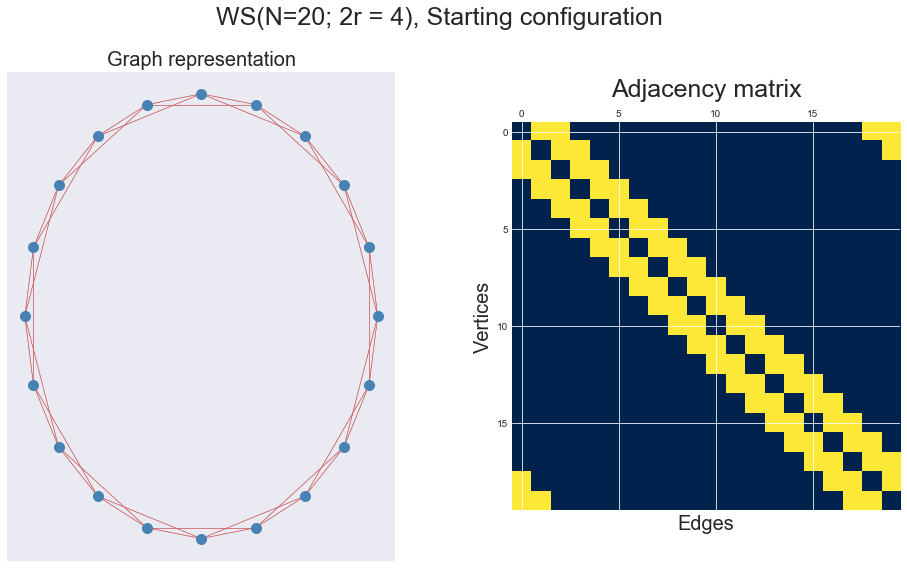

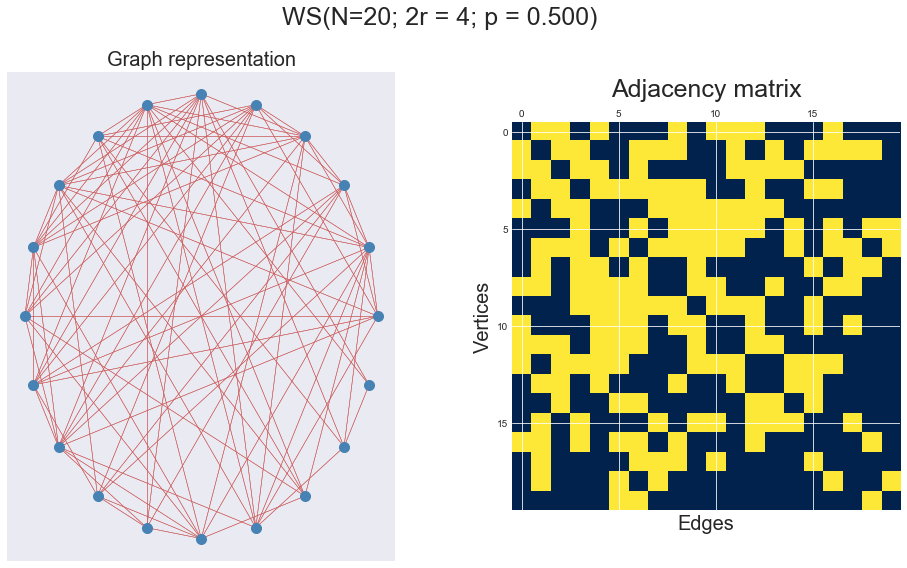

In [44]:
create_strogatz(20,2,.5)